###### Import the required libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import yellowbrick
import datetime
%matplotlib inline
import pandas_datareader.data as web

###### Load the datasets

In [ ]:
os.makedirs('data', exist_ok=True)


start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2020, 5, 31)

data_500 = yf.download("^GSPC", start=start, end=end)

# Convert index to string date format
data_500['Date'] = data_500.index.strftime('%Y-%m-%d')

# Reset index and keep the original columns
data_500.reset_index(drop=True, inplace=True)

# Get the original column names from the MultiIndex
original_columns = [col[0] for col in data_500.columns if col[0] != 'Date']
# add 'Date' to the beginning of the list
cols = ['Date'] + original_columns

# Reorder columns, including the MultiIndex columns, if needed
data_500 = data_500[cols]


# Save to CSV
data_500.to_csv(r'data/sp500_data.csv', index=False)
print("Saved successfully!")

[*********************100%***********************]  1 of 1 completed

Saved successfully!


In [ ]:
data_500 = pd.read_csv('sp500_data.csv')

In [ ]:
data_500.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971
1,2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044
2,2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985
3,2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951
4,2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971


In [ ]:
data_500.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
5125,2020-05-18,2968.090088,2913.860107,2913.860107,2953.909912,6364290000,2953.909912
5126,2020-05-19,2964.209961,2922.350098,2948.590088,2922.939941,4969330000,2922.939941
5127,2020-05-20,2980.290039,2953.629883,2953.629883,2971.610107,4992970000,2971.610107
5128,2020-05-21,2978.500000,2938.570068,2969.949951,2948.510010,4966940000,2948.510010
5129,2020-05-22,2956.760010,2933.590088,2948.050049,2955.449951,3952800000,2955.449951


In [ ]:
data_500.shape

(5130, 7)

###### Describe data

In [ ]:
data_500.describe()

,High,Low,Open,Close,Volume,Adj Close
count,5130.000000,5130.000000,5130.000000,5130.000000,5.130000e+03,5130.000000
mean,1610.995689,1591.619046,1601.711898,1601.876674,3.134990e+09,1601.876674
std,613.904379,610.780283,612.468993,612.525419,1.508044e+09,612.525419
min,695.270020,666.789978,679.280029,676.530029,3.560700e+08,676.530029
25%,1164.680023,1146.172546,1156.892487,1156.852478,1.697700e+09,1156.852478
50%,1380.200012,1360.964966,1369.579956,1369.574951,3.243340e+09,1369.574951
75%,2038.142456,2015.500000,2026.562531,2026.080017,3.945430e+09,2026.080017
max,3393.520020,3378.830078,3380.449951,3386.149902,1.145623e+10,3386.149902


###### Summary of the data

In [ ]:
data_500.describe(include=['O'])

,Date
count,5130
unique,5130
top,2020-05-22
freq,1


###### Datatype Check

In [ ]:
data_500.dtypes

,0
Date,object
High,float64
Low,float64
Open,float64
Close,float64
Volume,int64
Adj Close,float64


###### NULL check

In [ ]:
data_500.isnull().sum()

,0
Date,0
High,0
Low,0
Open,0
Close,0
Volume,0
Adj Close,0


##### Big 5 Stocks and S&P 500

In [ ]:
import yfinance as yf
import pandas as pd
import datetime

tickers = ['AAPL','MSFT','GOOGL','AMZN', 'NFLX', '^GSPC']

start = datetime.datetime(2015, 4, 9)
end = datetime.datetime(2020, 4, 9)

top5_df = pd.DataFrame()

for ticker in tickers:
    df1 = yf.download(ticker, start=start, end=end)
    top5_df[ticker] = df1['Close']   # Always use 'Close'

top5_df.rename(columns={'^GSPC': 'data_500'}, inplace=True)

# Reset index to make 'Date' a column
top5_df = top5_df.reset_index()

# Convert 'Date' to string format
top5_df['Date'] = top5_df['Date'].dt.strftime('%Y-%m-%d')

print(top5_df.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

         Date       AAPL       MSFT      GOOGL       AMZN       NFLX  \
0  2015-04-09  28.264347  35.800282  27.270618  19.177000  62.785713   
1  2015-04-10  28.384943  36.007416  27.296495  19.132500  64.938568   
2  2015-04-13  28.329115  36.041939  27.301472  19.118000  67.811432   
3  2015-04-14  28.206285  35.946999  26.860582  19.255501  68.387146   
4  2015-04-15  28.313480  36.473488  26.923281  19.172501  67.922859   

      data_500  
0  2091.179932  
1  2102.060059  
2  2092.429932  
3  2095.840088  
4  2106.629883  


###### Correlation - S&P500 and Big 5

Text(0.5, 1.0, 'Top 5 Stocks Correlation with S&P 500')

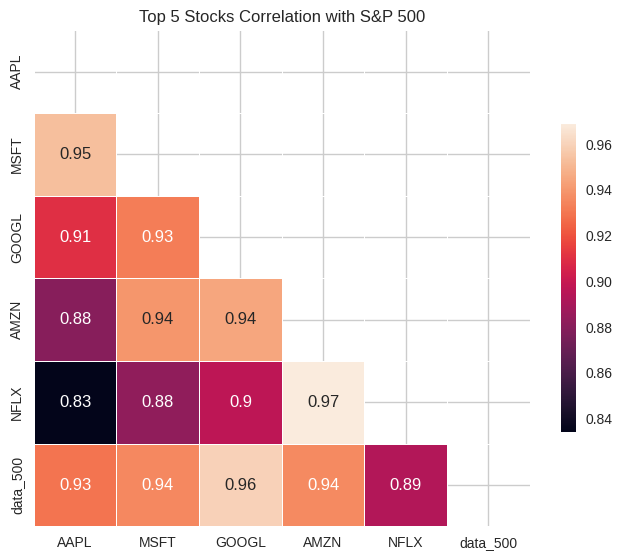

In [ ]:
corr = top5_df.drop(columns=['Date']).corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#correlation matrix
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, mask=mask, square=True, linewidths=.5, annot=True,
            cbar_kws={"shrink": .5})
ax.set_title('Top 5 Stocks Correlation with S&P 500')

###### Returns - S&P 500 and Big 5

Rate of return(ROR) tells what % is gained or lost over a period of time.

** Rate of Return % = (Curent Price - Starting Price)/ Starting Price * 100 **

 ploting the yearly returns of the big 5 stocks with S&P 500 in last 5 years.

Text(0.5, 1.0, 'Big 5 stocks and S&P 500 Returns in last 5 Years')

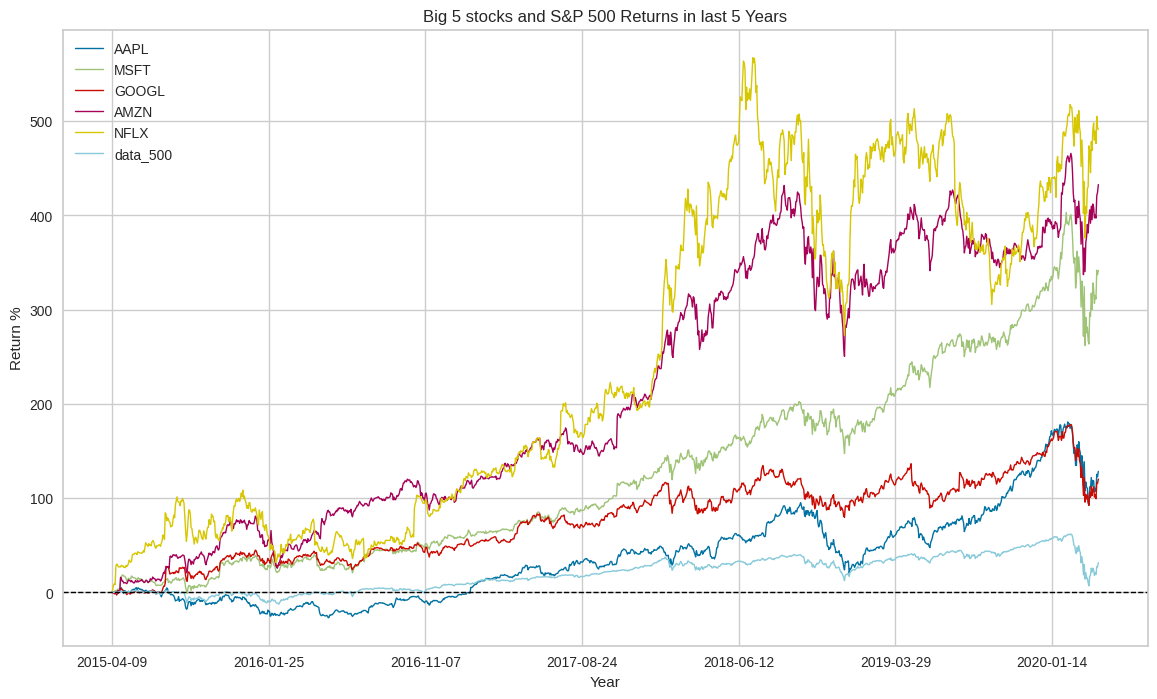

In [ ]:
top5_df_dup = top5_df.copy()
# Instead of dropping 'Date', set it as the index
top5_df_dup = top5_df_dup.set_index('Date')

# Calculate returns as before
top5_df_dup = (top5_df_dup - top5_df_dup.iloc[0, :])/top5_df_dup.iloc[0, :]*100
top5_df_dup.plot(legend=True, figsize=(14, 8), linewidth=1)
plt.axhline(y=0, linestyle='dashed', color='black', linewidth=1)
plt.xlabel('Year')
plt.ylabel('Return %')
plt.title('Big 5 stocks and S&P 500 Returns in last 5 Years')

##### Annualized Returns - S&P500 and Big 5
 See the total returns of Big 5 stocks and S&P 500 in Bar chart.

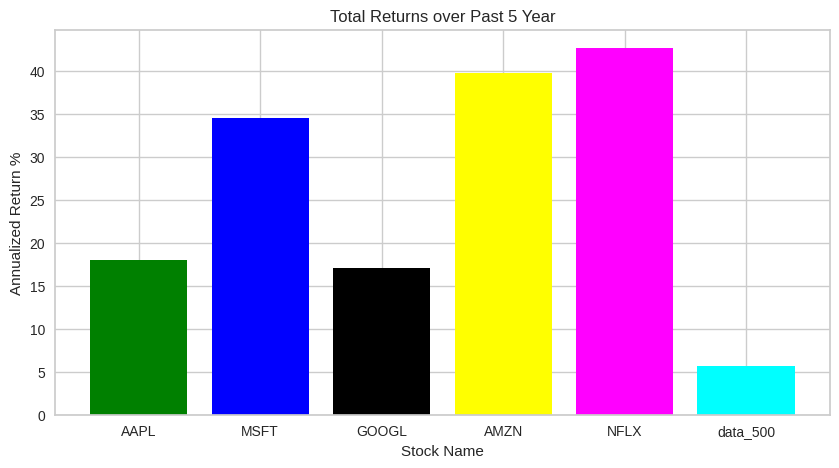

In [ ]:
annual_retn = {}
for t in top5_df_dup.columns:
    ## Annulized returns averaged for last 5 years
    annual_retn[t] = ((top5_df_dup[t][-1:].values/100 + 1)**(1/5) - 1)*100
list2 = []
for key, value in annual_retn.items():
    list2.append(value[0])

fig, ax = plt.subplots(figsize=(10, 5))
# Use a valid color or sequence of colors
plt.bar(list(annual_retn.keys()), list2, color=['green', 'blue', 'black', 'yellow', 'magenta', 'cyan', 'red'])
plt.xlabel('Stock Name')
plt.ylabel('Annualized Return %')
plt.title('Total Returns over Past 5 Year')
plt.show()

From the above plot, Netflix had amazing returns at 45% rate annually in last 5 years and S&P 500 had about 6% returns annually.

###### Daily Returns of S&P 500 (Simple Returns)

In [ ]:
# Instead of 'close', use 'Adj Close' which is still in the DataFrame
data_500['Adj Close'] = pd.to_numeric(data_500['Adj Close'], errors='coerce')

# Now calculate daily returns using 'Adj Close'
daily_close = data_500['Adj Close']
data_500['Return'] = 100 * (data_500['Adj Close'].pct_change())

# Rounding the change to 2 digits after decimal
daily_pct_chg = round(data_500['Return'], 2)

# Print `daily_pct_chg`
daily_pct_chg.head()

,Return
0,NaN
1,-3.83
2,0.19
3,0.10
4,2.71


##### Lets plot the daily simple returns to visualize it better

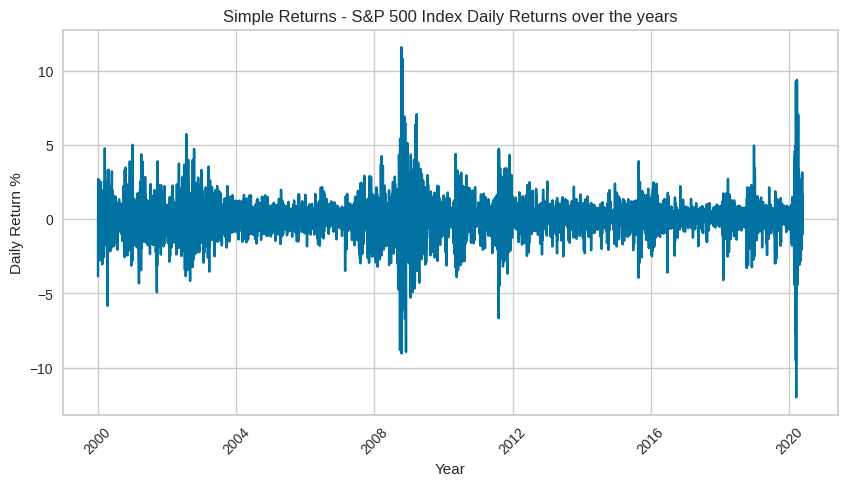

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

# Convert 'Date' column to datetime objects if it's not already
data_500['Date'] = pd.to_datetime(data_500['Date'])

# Plot the 'Return' column against the 'Date' column
plt.plot(data_500['Date'], data_500['Return'], color='b')
plt.xlabel('Year')
plt.ylabel('Daily Return %')
plt.title('Simple Returns - S&P 500 Index Daily Returns over the years')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.show()

- As we see that the most of the days are between (-4,4) range but there are few occasions where the daily percentages are high.

- We also know S&P 500 lost large % during 2008-09 financial crisis and during 2020 March that is COVID-19 crisis. Large -ve single day Percentage Change occured in 2020 March which is -11.98%. Average daily % change over the last 20 years is 0.033%.


###### Daily Log Returns of S&P 500

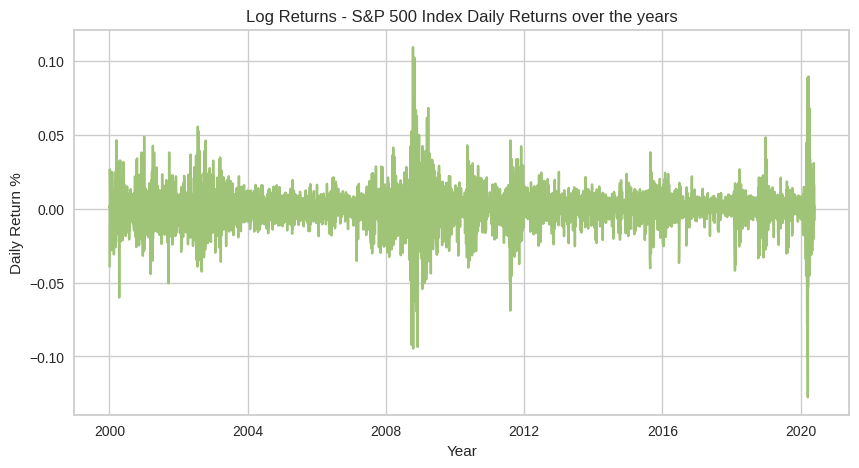

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

# Calculate daily log returns if not already calculated
if 'daily_log_returns' not in locals():  # Check if variable exists
    data_500['Log_Return'] = np.log(data_500['Close'] / data_500['Close'].shift(1))
    daily_log_returns = data_500['Log_Return']

# Now you can plot the daily log returns
plt.plot(data_500['Date'], daily_log_returns, color='g')
plt.xlabel('Year')
plt.ylabel('Daily Return %')
plt.title('Log Returns - S&P 500 Index Daily Returns over the years')
plt.show()

In [ ]:
daily_log_returns.describe()

,Log_Return
count,5129.000000
mean,0.000138
std,0.012571
min,-0.127652
25%,-0.004800
50%,0.000549
75%,0.005705
max,0.109572


###### Distribution of S&P 500 Daily returns

<ipython-input-250-562eb9efb5f8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_500['Return'],bins=1000,color='blue')


,Return
count,5129.000000
mean,0.021685
std,1.255191
min,-11.980000
25%,-0.480000
50%,0.050000
75%,0.570000
max,11.580000


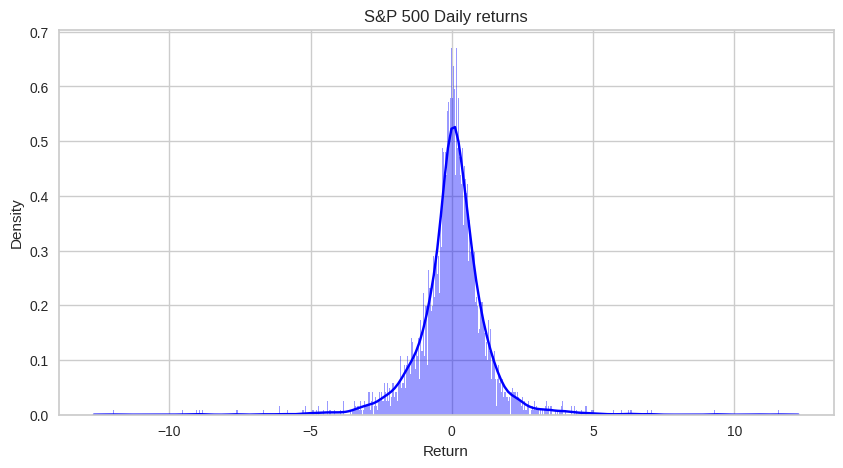

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(data_500['Return'],bins=1000,color='blue')
plt.title("S&P 500 Daily returns")
plt.ioff()
daily_pct_chg.describe()

###### Volatility
- Volatility is basically the dispersion of the financial asset returns over time
- It is important that the higher volatility then it is risky assets,  let's calculate daily, monthly and annual volatility for S&P 500.

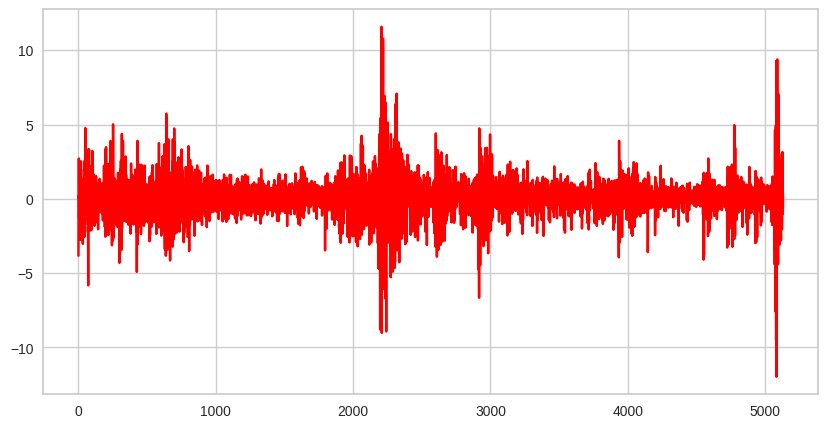

Daily volatility:  1.26%
Monthly volatility:  5.75%
Annual volatility:  19.93%


In [ ]:

# Plot the price returns
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(data_500['Return'],color = 'red')
plt.show()

# Calculate daily std of returns
std_daily = data_500['Return'].std()
print('Daily volatility: ', '{:.2f}%'.format(std_daily))

# Convert daily volatility to monthly volatility
# At an average there are 21 trading days in a month
std_monthly = math.sqrt(21) * std_daily
print('Monthly volatility: ', '{:.2f}%'.format(std_monthly))

# Convert daily volatility to annaul volatility
# At an average there are 252 trading days in an year
std_annual = math.sqrt(252) * std_daily
print('Annual volatility: ', '{:.2f}%'.format(std_annual))

##### Defining new Features and Target for S&P 500
- As part of EDA, we have seen how big 5 are influencing S&P 500. So, let's do the analysis on S&P 500 alone.
-Let's define features and targets for S&P 500 and see how they are correlated.

In [ ]:
data_500.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Return
0,2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971,NaN
1,2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044,-3.834467
2,2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985,0.192218
3,2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951,0.095568
4,2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971,2.709040


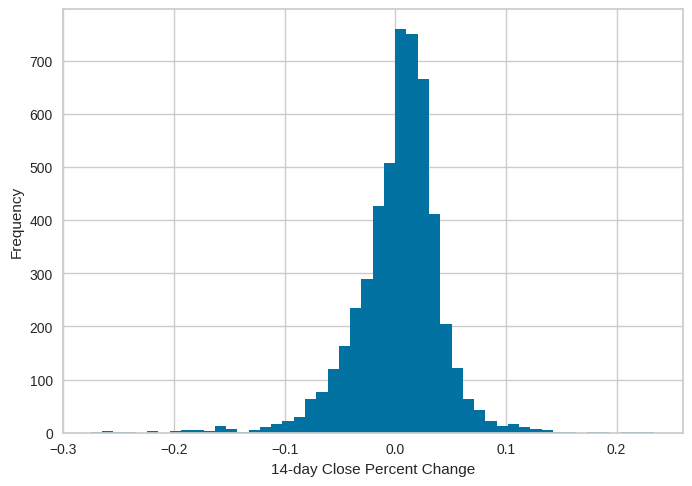

In [ ]:
data_500['14d_close_pct'] = data_500['Adj Close'].pct_change(14)  # Change 'Close' to 'Adj Close'
data_500['14d_close_pct'].plot.hist(bins=50)
plt.xlabel('14-day Close Percent Change')
plt.show()

###### Creating Features for 14 day Future Close and 14 day Future close percent change.

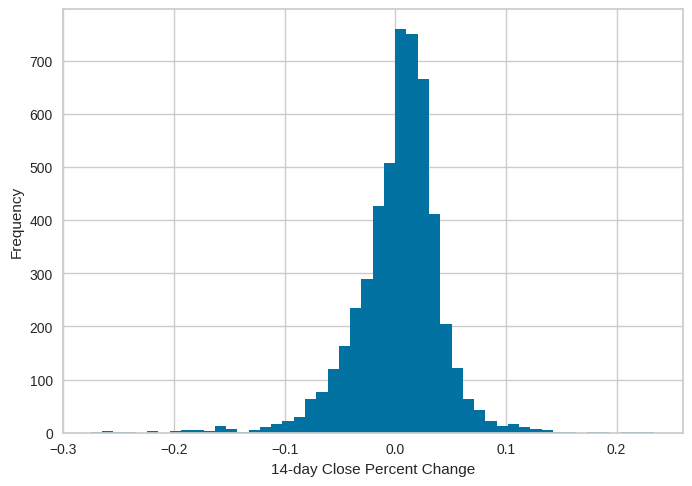

<ipython-input-254-5235bf8f9b31>:10: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data_500['14d_future_Close_pct'] = data_500['14d_future_Close'].pct_change(14)


In [ ]:
data_500['14d_close_pct'] = data_500['Adj Close'].pct_change(14)  # Change 'Close' to 'Adj Close'
data_500['14d_close_pct'].plot.hist(bins=50)
plt.xlabel('14-day Close Percent Change')
plt.show()

# In cell 130:

# Similarly, use 'Adj Close' or another suitable column for future calculations
data_500['14d_future_Close'] = data_500['Adj Close'].shift(-14)  # Change 'Close' to 'Adj Close'
data_500['14d_future_Close_pct'] = data_500['14d_future_Close'].pct_change(14)

In [ ]:
#!pip install finta
from finta import TA

# Assuming 'Adj Close' is the relevant price column
# Use the 'close' parameter to specify the closing price column
data_500['ma14'] = TA.SMA(data_500, period=14, column='Adj Close')
data_500['ma200'] = TA.SMA(data_500, period=200, column='Adj Close')

# Calculate RSI and EMA using 'Adj Close'
data_500['rsi14'] = TA.RSI(data_500, period=14, column='Adj Close')
data_500['rsi200'] = TA.RSI(data_500, period=200, column='Adj Close')
data_500['ema14'] = TA.EMA(data_500, period=14, column='Adj Close')
data_500['ema200'] = TA.EMA(data_500, period=200, column='Adj Close')

In [ ]:
corr = data_500.corr()

<Axes: >

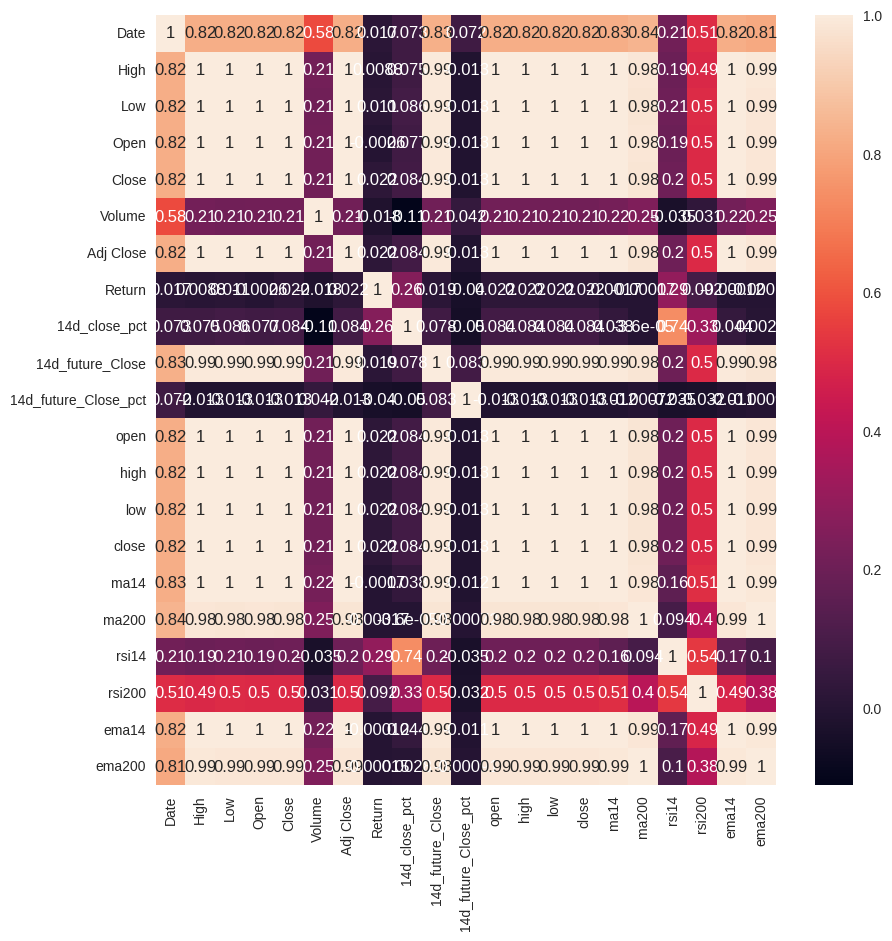

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True)

##### Interpretation:
- 14-day future closing price, 14-day and 200-day moving average and 14-day and 200-day EMA are highly correlated with Adjusted Closing price of the stock.

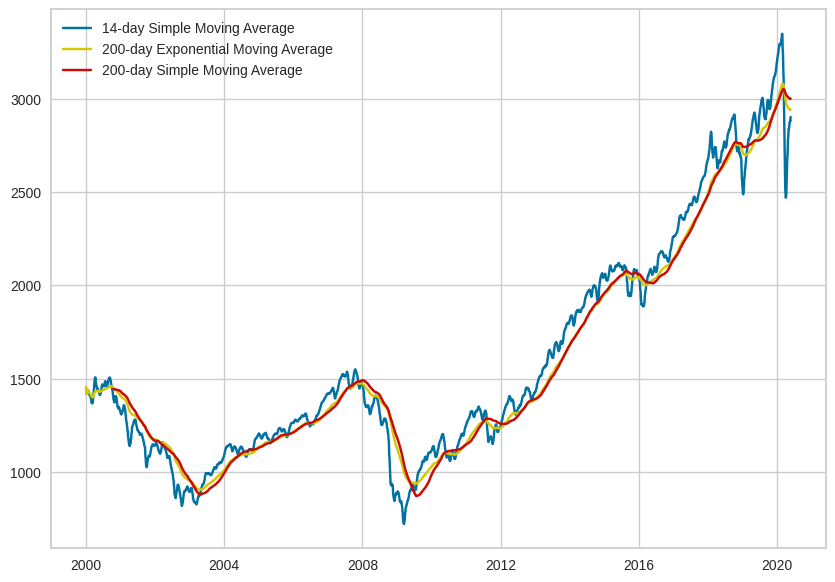

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(data_500['Date'], data_500['ma14'], label='14-day Simple Moving Average', color='b')
plt.plot(data_500['Date'], data_500['ema200'], label='200-day Exponential Moving Average', color='y')
plt.plot(data_500['Date'], data_500['ma200'], label='200-day Simple Moving Average', color='r')
plt.legend()
plt.show()

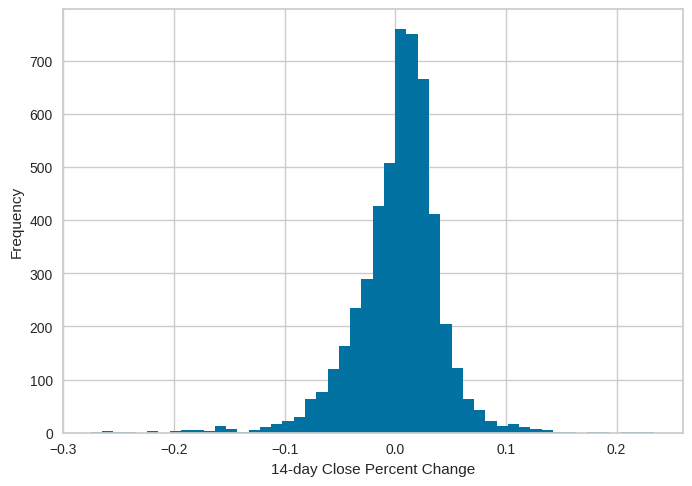

<ipython-input-262-5235bf8f9b31>:10: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data_500['14d_future_Close_pct'] = data_500['14d_future_Close'].pct_change(14)


In [ ]:

data_500['14d_close_pct'] = data_500['Adj Close'].pct_change(14)  # Change 'Close' to 'Adj Close'
data_500['14d_close_pct'].plot.hist(bins=50)
plt.xlabel('14-day Close Percent Change')
plt.show()

# In cell 130:

# Similarly, use 'Adj Close' or another suitable column for future calculations
data_500['14d_future_Close'] = data_500['Adj Close'].shift(-14)  # Change 'Close' to 'Adj Close'
data_500['14d_future_Close_pct'] = data_500['14d_future_Close'].pct_change(14)

###### Train/Test data split
- Time series data can be sliced randomly. So, I take sliced first 85% data to train the model and remaining 15% to test the models.

In [ ]:
import statsmodels.api as sm

# Assuming '14d_future_Close_pct' is your target variable and the rest are features
# You should adjust these based on your specific use case
target = data_500['14d_future_Close_pct']
features = data_500[['Adj Close', 'ma14', 'ma200', 'rsi14', 'rsi200', 'ema14', 'ema200']]

# Add a constant to the features
linear_features = sm.add_constant(features)

# Split the data into train and test sets
train_size = int(0.85 * target.shape[0])
train_features = linear_features[:train_size]
train_targets = target[:train_size]
test_features = linear_features[train_size:]
test_targets = target[train_size:]

###### Buliding models
1. Decision Tree.

In [ ]:
# Taking first 4000 days of data as training dataset
train_features=train_features[4000:]
train_targets=train_targets[4000:]
# Taking 200 days worth of data for testing
test_features=test_features[200:]
test_targets=test_targets[200:]

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(max_depth=5)
decision_tree.fit(train_features, train_targets)


DecisionTreeRegressor(max_depth=5)

In [ ]:
print(decision_tree.score(train_features, train_targets))

0.7712255860537994


- Accuracy on the training dataset is 0.771 which is excellent, so let's check how the decision tree performed on test dataset.



In [ ]:
print(decision_tree.score(test_features, test_targets))

0.01861861519886554


- Accuracy of the decision tree is 0.186. That means the tree didn't perform well for the test dataset. Decision tree probably overfit for the training dataset.

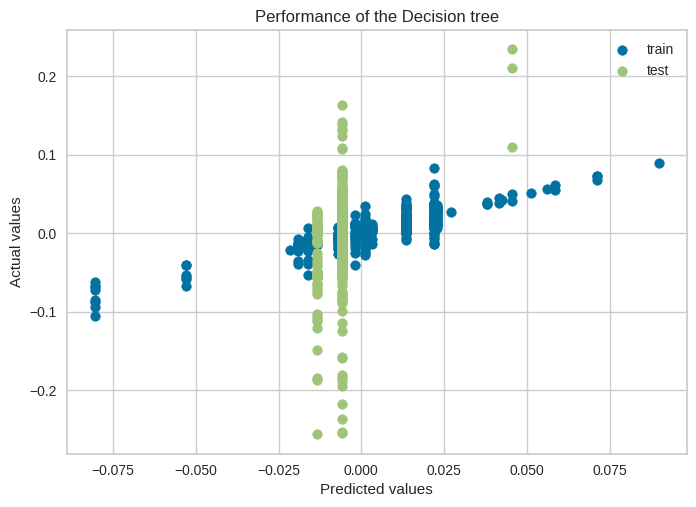

In [ ]:

train_predictions = decision_tree.predict(train_features)
test_predictions = decision_tree.predict(test_features)
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Performance of the Decision tree')
plt.legend()
plt.show()

2. Random Forest.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=200,
                                     max_depth=5,
                                     max_features=5,
                                     random_state=42)
random_forest.fit(train_features, train_targets)

RandomForestRegressor(max_depth=5, max_features=5, n_estimators=200,
                      random_state=42)

In [ ]:
print(random_forest.score(train_features, train_targets))

0.8507707102224015


In [ ]:
print(random_forest.score(test_features, test_targets))

0.0558471457666575


- The accuracy is not great. That's because I used random hyperparameters to begin with.
So, let's figure out what are the best hyperparameters for Random Forest regressor.

In [ ]:
from sklearn.model_selection import ParameterGrid
grid = {'n_estimators': [200], 'max_depth':[3, 4,5], 'max_features': [1,2,3,4]}
from pprint import pprint
pprint(list(ParameterGrid(grid)))

[{'max_depth': 3, 'max_features': 1, 'n_estimators': 200},
 {'max_depth': 3, 'max_features': 2, 'n_estimators': 200},
 {'max_depth': 3, 'max_features': 3, 'n_estimators': 200},
 {'max_depth': 3, 'max_features': 4, 'n_estimators': 200},
 {'max_depth': 4, 'max_features': 1, 'n_estimators': 200},
 {'max_depth': 4, 'max_features': 2, 'n_estimators': 200},
 {'max_depth': 4, 'max_features': 3, 'n_estimators': 200},
 {'max_depth': 4, 'max_features': 4, 'n_estimators': 200},
 {'max_depth': 5, 'max_features': 1, 'n_estimators': 200},
 {'max_depth': 5, 'max_features': 2, 'n_estimators': 200},
 {'max_depth': 5, 'max_features': 3, 'n_estimators': 200},
 {'max_depth': 5, 'max_features': 4, 'n_estimators': 200}]


In [ ]:
test_scores = []
for g in ParameterGrid(grid):
    random_forest.set_params(**g)
    random_forest.fit(train_features, train_targets)
    test_scores.append(random_forest.score(test_features, test_targets))
best_idx = np.argmax(test_scores)
print(test_scores[best_idx])
print(ParameterGrid(grid)[best_idx])

0.05026954945863071
{'n_estimators': 200, 'max_features': 4, 'max_depth': 5}


Boosted models are general class of machine learning algorithms.
These work by iteratively fitting models such as decision trees to the data. They work by taking residual error of the first model to the next model and so on.

3. Gradient boosting

In [ ]:
# Build the gradient boosting algorithm with some hyperparameters
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(max_features=4,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
gb.fit(train_features, train_targets)

GradientBoostingRegressor(learning_rate=0.01, max_features=4, n_estimators=200,
                          random_state=42, subsample=0.6)

In [ ]:
print(gb.score(train_features, train_targets))

0.7437536334098643


In [ ]:
print(gb.score(test_features, test_targets))

0.024578882898274257


- Interpretation:
Gradient boosting gave us slightly better performance (0.024) than previous models but its still not enough to predict the stock prices accurately.

4 - Neural networks

- Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_train_features = sc.fit_transform(train_features)
scaled_test_features = sc.transform(test_features)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
#Creating the model
model = Sequential()

#Lets add layers
#First layer with 50 nodes, specify the input dim as scaled features from training set. I used ReLu activation function
model.add(Dense(50, input_dim=scaled_train_features.shape[1], activation='relu'))

#Another layer with 10 nodes
model.add(Dense(10, activation='relu'))

#Output layer and using linear for regression
model.add(Dense(1, activation='linear'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(scaled_train_features, train_targets, epochs=50)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2365
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0610 
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0074 
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0042 
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023 
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0015 
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.9056e-04 
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.3760e-04 
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.6705e-04 
Epoch 13/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.1414e-04 
Epoch 14/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.3929e-04
Epoch 15/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - 

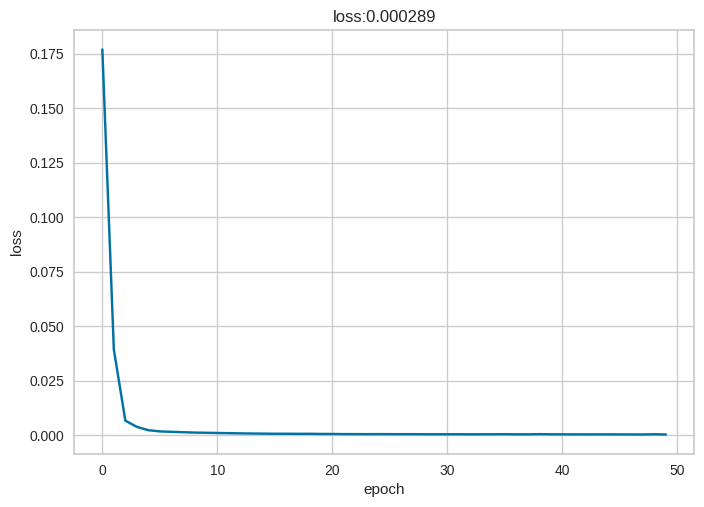

In [ ]:
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
0.6107976932199127
-714.705827690308


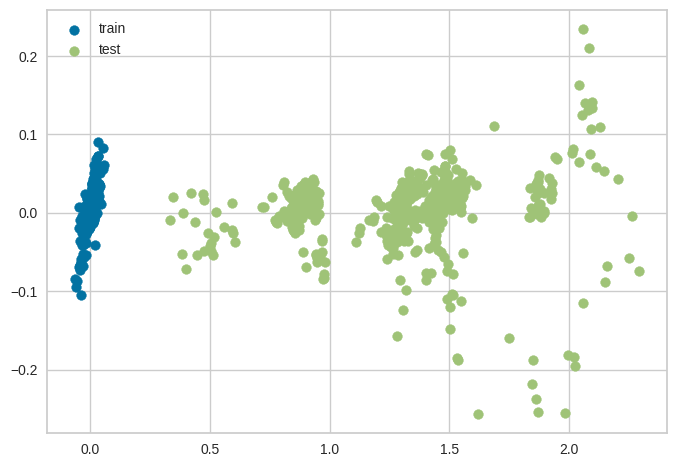

In [ ]:
from sklearn.metrics import r2_score

train_preds = model.predict(scaled_train_features)
test_preds = model.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.legend()
plt.show()

#### **Interpratition**:

Neural network performed poorly with the dataset. That's because I didn't tune the model well, there's a lot of scope for improvment. Like creating custom loss functions and using different activation functions etc,
I could have tried other options but due to lack of time I'm going to try one more model.



5. Facebook's prophet.

In [ ]:
# Defining proper training and test data sets
train_size = int(data_500.shape[0]*0.85)
train_df = data_500.iloc[:train_size]
test_df = data_500.iloc[train_size+1:]

In [ ]:
from prophet import Prophet

# reset index to get date_time as a column
prophet_df = data_500[['Date','Adj Close']]

# prepare the required dataframe
prophet_df.rename(columns={'Date':'ds','Adj Close':'y'},inplace=True)
prophet_df.ds = pd.to_datetime(prophet_df.ds)

prophet_df = prophet_df[['ds','y']]

# Now you can use Prophet
pro_model = Prophet()
pro_model.fit(prophet_df)

# ... rest of your code ...

<ipython-input-283-8763e47f50f0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prophet_df.rename(columns={'Date':'ds','Adj Close':'y'},inplace=True)
<ipython-input-283-8763e47f50f0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prophet_df.ds = pd.to_datetime(prophet_df.ds)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzc61_p9z/7h8rd1p3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzc61_p9z/u4w2cmpi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_thre

In [ ]:
from prophet import Prophet

pro_model = Prophet() # prophet module is imported above so no need to write prophet.Prophet()
pro_model.fit(prophet_df)
#Create future dataframe
test_dates = pro_model.make_future_dataframe(periods=test_df.shape[0])
#Forecast the data using the model
forecast_df = pro_model.predict(test_dates)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzc61_p9z/gqwoggrw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzc61_p9z/7u2g77u4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56677', 'data', 'file=/tmp/tmpzc61_p9z/gqwoggrw.json', 'init=/tmp/tmpzc61_p9z/7u2g77u4.json', 'output', 'file=/tmp/tmpzc61_p9z/prophet_modelrz9cel_l/prophet_model-20250327181606.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:16:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:16:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


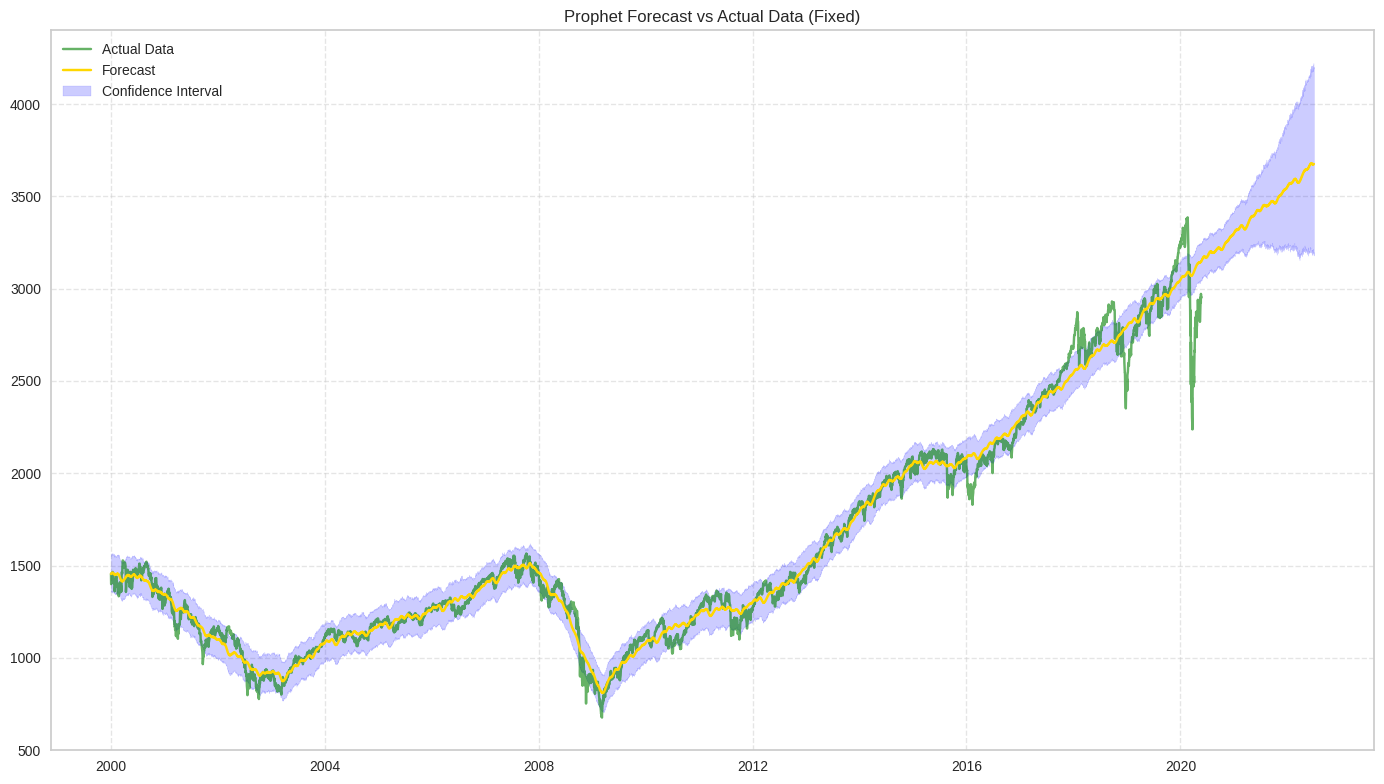

In [ ]:
# Filter actual data to match forecast's date range
prophet_df_filtered = prophet_df[prophet_df['ds'] >= forecast_df['ds'].min()]

fig, ax = plt.subplots(figsize=(14, 8))

# Plot cleaned actual data (aligned)
ax.plot(prophet_df_filtered['ds'], prophet_df_filtered['y'], c='green', label='Actual Data', alpha=0.6)

# Forecast
ax.plot(forecast_df['ds'], forecast_df['yhat'], c='gold', label='Forecast')

# Confidence interval
ax.fill_between(forecast_df['ds'], forecast_df['yhat_lower'], forecast_df['yhat_upper'],
                color='blue', alpha=0.2, label='Confidence Interval')

ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_title("Prophet Forecast vs Actual Data (Fixed)")

plt.tight_layout()
plt.show()

In [ ]:
forecast_df.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
datetime,,,,,,,,,,,,,,,,,,,
2022-06-26,2022-06-26,3668.841223,3194.466449,4177.833460,3198.247059,4185.948036,2.722276,2.722276,2.722276,-1.375858,-1.375858,-1.375858,4.098134,4.098134,4.098134,0.0,0.0,0.0,3671.563500
2022-06-27,2022-06-27,3669.531514,3188.704547,4221.938103,3198.150864,4186.930522,3.202404,3.202404,3.202404,-0.326897,-0.326897,-0.326897,3.529300,3.529300,3.529300,0.0,0.0,0.0,3672.733918
2022-06-28,2022-06-28,3670.221805,3198.824713,4191.537747,3198.054669,4187.913008,4.318164,4.318164,4.318164,1.203458,1.203458,1.203458,3.114706,3.114706,3.114706,0.0,0.0,0.0,3674.539969
2022-06-29,2022-06-29,3670.912096,3179.245805,4201.524241,3197.958474,4188.895495,3.145494,3.145494,3.145494,0.283730,0.283730,0.283730,2.861765,2.861765,2.861765,0.0,0.0,0.0,3674.057590
2022-06-30,2022-06-30,3671.602386,3182.698402,4196.233511,3197.862279,4189.877981,3.843556,3.843556,3.843556,1.069316,1.069316,1.069316,2.774240,2.774240,2.774240,0.0,0.0,0.0,3675.445942


In [ ]:
metric_df = forecast_df.set_index('ds')[['yhat']].join(prophet_df.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2_score(metric_df.y, metric_df.yhat)

0.9834319129894793

R-square value is 0.98 which means the model is a great fit. Let's find out if its an overfit using Mean squared error and Mean absolute error.



In [ ]:
mean_squared_error(metric_df.y, metric_df.yhat)

6214.925578482243

Mean square error is decent so the model is a good fit. Let's check mean absolute error as well.

In [ ]:
mean_absolute_error(metric_df.y, metric_df.yhat)

51.24331594626781

Mean absolute error is 51 which is less.
It means the predicted value can be 51 basis points away from the actual value either side of the curve at the maximum.

#### Interpretition:

From the above plot and R-square, mean square error and mean absolute error. I think Prophet predicts the stock prices with decent accuracy.